<h1>Análisando algoritmos de ordenamiento</h1>

In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline


<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento rápido </h3>

In [2]:
def quick_sort(L, first, last):
    i = first
    j = last    
    pivote = (L[i] + L[j]) / 2

    while i < j:
        while L[i] < pivote:
            i+=1
        while L[j] > pivote:
            j-=1
        if i <= j:
            x = L[j]
            L[j] = L[i]
            L[i] = x
            i+=1
            j-=1
    if first < j:
        L = quick_sort(L, first, j)
    if last > i:
        L = quick_sort(L, i, last)
    return L

In [3]:
B = np.random.permutation(range(0,10))
print B
print quick_sort(B,0,len(B)-1)

[7 5 1 8 3 6 0 9 4 2]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo (justo antes de cambiar de pivote) externo el subarreglo $A[0..i]$ tendrá todos sus elementos menores o iguales al pivote, mientras que el subarreglo $A[i+1...j-1]$ tendrá todos sus elementos mayores o iguales al pivote.

In [4]:
def invariant(A,B,p):
    l1 = list(A)
    l2 = list(B)
    s1= len(A)
    s2= len(B)
    f1=True
    f2=True
    
    for i in range(s1):
          if p<A[i]:
            f1=False
            
    for j in range(s2):
          if p>B[j]:
            f1=False

    return f1 == f2 ==True

In [5]:
print invariant([1, 2, 3, 4], [5, 6, 7, 8], 5)
print invariant([1, 2, 3, 4], [5, 3, 2, 1], 4)

True
False


Algoritmo de ordenamiento rápido incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [6]:
def right_quick_sort(L, first, last):
    i = first
    j = last    
    pivote = (L[i] + L[j]) / 2
    
    while i < j:
        
        while L[i] < pivote:
            i+=1
        while L[j] > pivote:
            j-=1
        
        if i <= j:
            x = L[j]
            L[j] = L[i]
            L[i] = x
            i+=1
            j-=1
        
    
    assert invariant(L[0:i], L[i+1:],pivote)    
    if first < j:
        L = right_quick_sort(L, first, j)
        
    
    if last > i:
        L = right_quick_sort(L, i, last)
        
   

    return L
    

In [7]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_quick_sort(B,0,len(B)-1)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [8]:
def wrong_quick_sort(L, first, last):
    i = first
    j = last    
    pivote = (L[i] + L[j]) / 2
    try:
        while i < j:
        
            while L[i] < pivote:
                i+=1
            while L[j] > pivote:
                j-=1
        
            if i <= j:
                x = L[j]
                L[j] = L[i+1]
                L[i] = x
                i+=1
                j-=1
        
    
        assert invariant(L[0:i], L[i+1:],pivote)    
        if first < j:
            L = wrong_quick_sort(L, first, j)
        
    
        if last > i:
            L = wrong_quick_sort(L, i, last)
        
   

        return L
    
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "L[0:i]=", L[0:i]
        print "L[i+1:]=", L[i+1:]
        print "L[i]=", L[i]
        print "L[j]=", L[j]
        print "pivote=", pivote
    
        

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_quick_sort(B,0,len(B)-1)

Error en el invariante de ciclo!
L[0:i]= [5, 4, 6, 3, 1, 2]
L[i+1:]= [2, 9]
L[i]= 8
L[j]= 2
pivote= 7


<h4> Análisis del tiempo de ejecución</h4>

In [10]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_quick_sort(L, first, last, acct):
    i = first; acct.count()
    j = last    ; acct.count()
    pivote = (L[i] + L[j]) / 2; acct.count()
    acct.count()
    while i < j:
        acct.count()
        while L[i] < pivote:
            acct.count()
            i+=1; acct.count()
        acct.count()
        while L[j] > pivote:
            acct.count()
            j-=1; acct.count()
        acct.count()
        if i <= j:
            acct.count()
            x = L[j]; acct.count()
            L[j] = L[i]; acct.count()
            L[i] = x; acct.count()
            i+=1; acct.count()
            j-=1; acct.count()
            acct.count()
    if first < j:
        acct.count()
        L = acct_quick_sort(L, first, j, acct); acct.count()
        acct.count()
    if last > i:
        acct.count()
        L = acct_quick_sort(L, i, last, acct); acct.count()
        acct.count()
    acct.count()
    return L

In [11]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_quick_sort(B, 0, len(B)-1, acct)
acct.print_steps()

Number of steps = 220


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_quick_sort(l, 0, len(l)-1, acct) y contabiliza el número de pasos.

In [12]:
import random as rnd
import time

def exper_analysis(n):
    analysis= []
    results = []
    tiempo = []
    acct = Counter()
    for i in range(n):
        tic = time.clock()#get start time
        l = range(i+1)
        rnd.shuffle(l)        
        acct.reset()
        acct_quick_sort(l, 0, len(l)-1, acct)
        results.append(acct.steps)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
    analysis.append(results)
    analysis.append(tiempo)
    return analysis

In [13]:
print (exper_analysis(10))

[[5, 15, 19, 41, 87, 103, 159, 157, 178, 248], [2.2942274219343838e-05, 2.2036658131738164e-05, 1.5999217547700307e-05, 3.62246435042271e-05, 7.003431077483909e-05, 0.00010867393051268133, 0.00016512399997343526, 9.659904934460566e-05, 0.00010324023398704729, 0.00013765364531606301]]


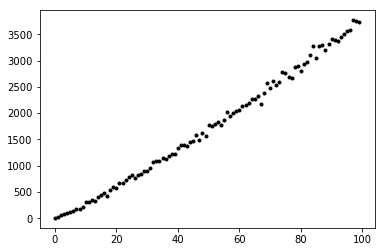

In [14]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100)[0])
pl.plot(x, y, 'k.')

<b>Análisis de Tiempo </b>
 
  <p>A continuación se representa en una gráfica el número de operaciones (negro), tiempo(rojo) y T(n)(azul) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (variando n) en el peor de los casos.</p>
  

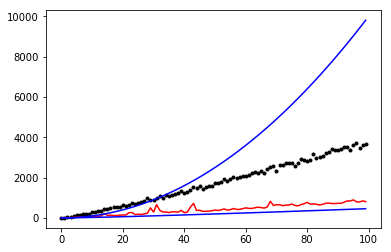

In [15]:
pl.clf()
resultados= []
ti=[]
ti2=[]
x = np.arange(100)
resultados = np.array(exper_analysis(100))
y = np.array(resultados[0])
t = np.array(resultados[1]*1000000)
for i in range(100):
    ti.append(i*math.log(i+1))
for i in range(100):
    ti2.append(i*i)
pl.plot(x, y,'k.', t, 'r', ti, 'b', ti2, 'b')